In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reshaping

In [2]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/main/employees_attrition.csv'
employees = pd.read_csv(url)

In [3]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employees['JobRole_New'] = employees['JobRole'].replace({'Research Director': 'Group1',
                                                         'Manufacturing Director': 'Group1'}) 
summary = employees.pivot_table(index='JobRole',
                                columns='Department',
                                values='MonthlyIncome',
                                aggfunc='mean')
summary.head()

Department,Human Resources,Research & Development,Sales
JobRole,,,
Healthcare Representative,NaN,7528.763359,NaN
Human Resources,4235.750000,NaN,NaN
Laboratory Technician,NaN,3237.169884,NaN
Manager,18088.636364,17130.333333,16986.972973
Manufacturing Director,NaN,7295.137931,NaN


# Melting

In [6]:
df = pd.DataFrame({
    'year': [2020, 2021],
    'prod-A':[ 10, 20],
    'prod-B': [30, 40],
    'prod-C': [50, 60]
})
df.head()

,year,prod-A,prod-B,prod-C
0,2020,10,30,50
1,2021,20,40,60


In [7]:
df_long = df.melt(id_vars=['year']).rename(columns={'variable': 'product_name',
                                                    'value': 'sales'})
#df_long.columns = ['year', 'product_name', 'sales']
#df_long

# Exercises
Filter the data for India alone
Convert filtered data to long format
rename: variable--> date, value--> confirmed
Get the value from last row, confirmed column

In [8]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_wide = pd.read_csv(url)
covid_wide.shape

(282, 757)

In [11]:
covid_wide.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22
277,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128
278,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,359,380,425,435,459,465,465,465,490,498
279,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664
280,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,306347,306777,306777,307206,307317,307636,308050,308556,309013,309293
281,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,230170,230170,230402,230402,230402,230603,230740,231040,231214,231299


In [33]:
covid_india = covid_wide[covid_wide['Country/Region'] == 'India']
covid_india = covid_india.melt(id_vars = ['Province/State',	'Country/Region', 'Lat', 'Long'])
covid_india = covid_india.rename(columns={'variable': 'Date', 'value': 'confirmed'})

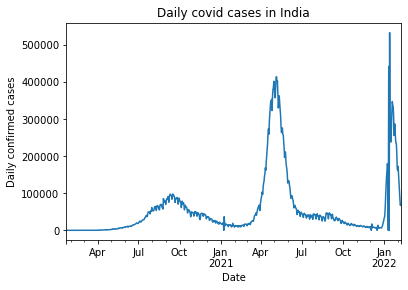

In [34]:
#covid_india.iloc[-1,:]['confirmed']
#covid_india['confirmed'].diff().plot.line();
covid_india['Date'] = pd.to_datetime(covid_india['Date'], format='%m/%d/%y')

#import matplotlib.pyplot as plt
covid_india.resample(on='Date', rule='1d')['confirmed'].sum().diff().plot.line()
plt.ylabel('Daily confirmed cases')
plt.title('Daily covid cases in India');

In [35]:
covid_long = covid_wide.melt(id_vars=covid_wide.columns[:4])
covid_long = covid_long.rename(columns={'variable': 'Date', 'value': 'confirmed'})
covid_long['Date'] = pd.to_datetime(covid_long['Date'], format='%m/%d/%y')
covid_countries = covid_long.groupby(['Country/Region', 'Date']).agg(confirmed=('confirmed', 'sum'))
covid_countries = covid_countries.reset_index()
covid_countries.head()

,Country/Region,Date,confirmed
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [36]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_wide = pd.read_csv(url)

deaths_long = deaths_wide.melt(id_vars=deaths_wide.columns[:4])
deaths_long = deaths_long.rename(columns={'variable': 'Date', 'value': 'deaths'})
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y')
deaths_countries = deaths_long.groupby(['Country/Region', 'Date']).agg(deaths=('deaths', 'sum'))
deaths_countries = deaths_countries.reset_index()
deaths_countries.head()


,Country/Region,Date,deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [37]:
covid = pd.merge(left=covid_countries, right=deaths_countries,
                 left_on=['Country/Region', 'Date'],
                 right_on=['Country/Region', 'Date'], how='left')
covid.head()

,Country/Region,Date,confirmed,deaths
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0


In [38]:
df = pd.DataFrame({
    'year': [2020, 2021],
    'prod-A':[ 10, 20],
    'prod-B': [30, 40],
    'prod-C': [50, 60]
})
df = df.set_index('year')
df = df.drop(2020, axis=0) # drop a row using its label
df = df.drop(['prod-C'], axis=1) # drop a column using its column name
df

,prod-A,prod-B
year,,
2021,20,40


In [39]:
!pip install xlrd

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
retail = pd.read_excel(url)
retail.shape

(541909, 8)

In [41]:
# Exercises
# Identify customer with maximum invoice value
# Convert InvoiceDate to datetime column
# Plot daywise total sales as line chart
# Identify the month in which the sales is usually high

In [42]:
retail['total_price'] = retail['UnitPrice'] * retail['Quantity']
retail_new = retail[retail['total_price']>= 0].copy()

In [43]:
# Identify customer with maximum invoice value
invoice_summary = retail_new.groupby(['CustomerID', 'InvoiceNo']).agg(
    InvoiceAmount=('total_price', 'sum'),
    InvoiceDate=('InvoiceDate', 'first'),
    TotalQuantities=('Quantity', 'sum')).reset_index()
invoice_summary.sort_values(by='InvoiceAmount', ascending=False).iloc[0]['CustomerID']

16446.0

In [44]:
retail_new.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


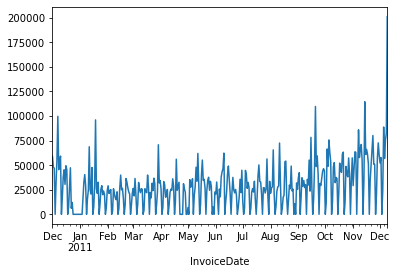

In [45]:
# Convert InvoiceDate to datetime column
retail_new['InvoiceDate'] = pd.to_datetime(retail_new['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')

# Plot daywise total sales as line chart
retail_new.resample(on='InvoiceDate', rule='1d')['total_price'].sum().plot.line();

In [46]:
# Identify the month in which the total sales is high

retail_new.resample(on='InvoiceDate', 
                    rule='1m')['total_price'].sum().sort_values(ascending=False).index[0]

Timestamp('2011-11-30 00:00:00')

In [47]:
retail_new['InvoiceDate'].describe()

<ipython-input-47-e55ecb44b273>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  retail_new['InvoiceDate'].describe()


count                  532619
unique                  19988
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [48]:
latest_date = retail_new['InvoiceDate'].max()
latest_date

Timestamp('2011-12-09 12:50:00')

# Customer Purchase Analysis

In [49]:
invoice_summary = retail_new.groupby(['CustomerID', 'InvoiceNo']).agg(
    InvoiceAmount=('total_price', 'sum'),
    InvoiceDate=('InvoiceDate', 'first'),
    TotalQuantities=('Quantity', 'sum')).reset_index()

In [50]:
latest_date = retail_new['InvoiceDate'].max()
customers = invoice_summary.groupby('CustomerID').agg(monetary=('InvoiceAmount','sum'),
                                                      frequency=('InvoiceNo', 'nunique'),
                                                      last_purchase_date=('InvoiceDate', 'max'))
customers['recency'] = latest_date - customers['last_purchase_date']
customers['recency'] = customers['recency'].dt.days
#customers[customers['recency'] > 90]

In [51]:
q1 = customers['recency'].quantile(0.25)
q2 = customers['recency'].quantile(0.5)
q3 = customers['recency'].quantile(0.75)
iqr = q3 - q1
iqr

124.0

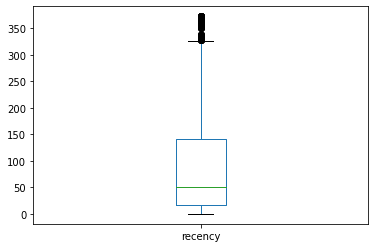

In [52]:
customers['recency'].plot.box();

# Group customers based on recency

In [53]:
bins = customers['recency'].quantile([ 0, 0.25, 0.5, 0.75, 1])
#print(np.hstack([[-1], bins.values]))
bins[0] = -np.inf
print(bins.values)
#custom_bins = [-1, 10, 30, 90, 120, np.inf]
customers['recency_group'] = pd.cut(customers['recency'],
                                    bins=bins,
                                    labels=['G1', 'G2', 'G3', 'G4'])
customers['recency_group'].value_counts()

[-inf  17.  50. 141. 373.]


G1    1126
G4    1084
G3    1066
G2    1063
Name: recency_group, dtype: int64

In [54]:
def square_numbers(x):
  '''
  This function squares all the numbers in a list
  '''
  return [i*i for i in x]

data = [10, 40, 2, 4, 5]
square_numbers(data)

[100, 1600, 4, 16, 25]

In [55]:
square_numbers = lambda x: [i*i for i in x]
square_numbers(data)

[100, 1600, 4, 16, 25]

In [56]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/main/naukri_jobs_datascience.csv'
jobs = pd.read_csv(url)
jobs.head()

,id,title,location,experience,skills,company,salary,description,posted_date,type,url
0,280918001664,Data Science,Mumbai,2-4 yrs,"Algorithms, Machine Learning, Python, Java, Da...",Netcore Solutions Pvt Ltd,"2,00,000 - 7,00,000 P.A.",At least 2 year of experience in data engineer...,1 day ago,hotjob,https://www.naukri.com/job-listings-Data-Scien...
1,280818003404,Analyst / Sr. Analyst (data Science),Gurgaon,5-8 yrs,"predictive modeling, predictive analytics, mac...",Cvent India Pvt. Ltd.,"5,00,000 - 10,00,000 P.A.",Strong experience on providing predictive mode...,Today,hotjob,https://www.naukri.com/job-listings-Analyst-Sr...
2,280918008755,ETL Lead & Data Science,"Chennai, Bengaluru, Mumbai, Pune, Noida",7-10 yrs,"SQL, Data Analysis, Text Mining, SAS, R, Stati...",COMPUTER POWER GROUP PRIVATE LIMITED,"10,00,000 - 15,00,000 P.A.",Industry experience in building and operationa...,1 day ago,hotjob,https://www.naukri.com/job-listings-ETL-Lead-D...
3,270918901342,Specialist - Data Science,"Delhi NCR, Bengaluru, Gurgaon",7-12 yrs,"Specialist - Data Science, Data Science, data ...",Brainsearch Consulting Pvt Ltd.Â,Not disclosed,- Experience with one or more data science pro...,1 day ago,premium,https://www.naukri.com/job-listings-Specialist...
4,260918002450,Group Manager - Data Science - Python/nlp,Bengaluru,6-11 yrs,"machine learning, text mining, r, nlp, data sc...",Staffio HR,Not disclosed,- This is a Team management role - Skill set ...,1 day ago,premium,https://www.naukri.com/job-listings-Group-Mana...
